## Library/Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.display import display

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 20)

## Import Data

#### Peak data

This dataset was retrieved from the UCI data repository

In [3]:
data = pd.read_csv('winequality-red.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

#### Inspect for missing data

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Quick stats

In [6]:
display(data.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


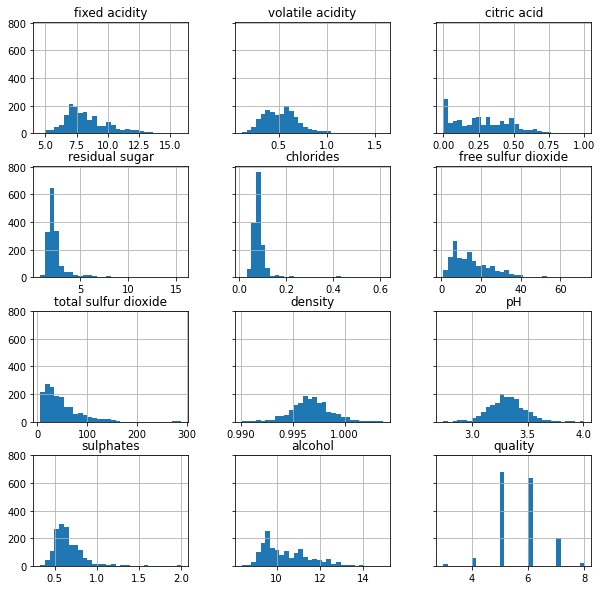

In [7]:
hist = data.hist(bins=30, sharey=True, figsize=(10, 10))

#### Replace spaces in feature names

In [8]:
new_features = []
for col in data.columns:
    new_features.append(col.replace(' ', '_'))

data.columns = new_features

In [12]:
n_features = len(data.columns)
n_features

12

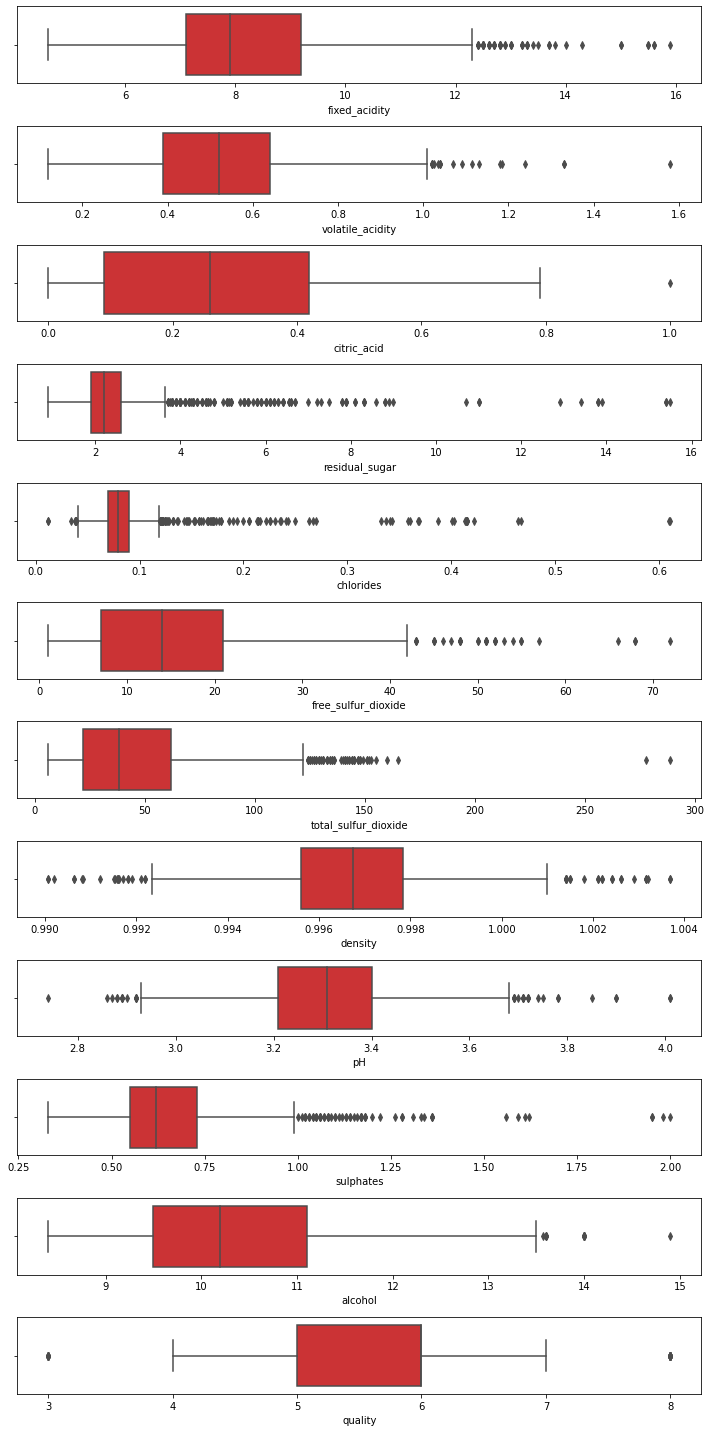

In [13]:
f, axs = plt.subplots(n_features,1, squeeze=False, figsize=(10,20))

for i, col in enumerate(data.columns):
    sns.boxplot(data=data,
                x=col,
                orient='h',
                palette='Set1',
                ax=axs[i,0])
f.tight_layout()
plt.show()

In [14]:
data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [15]:
data.corr().quality

fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

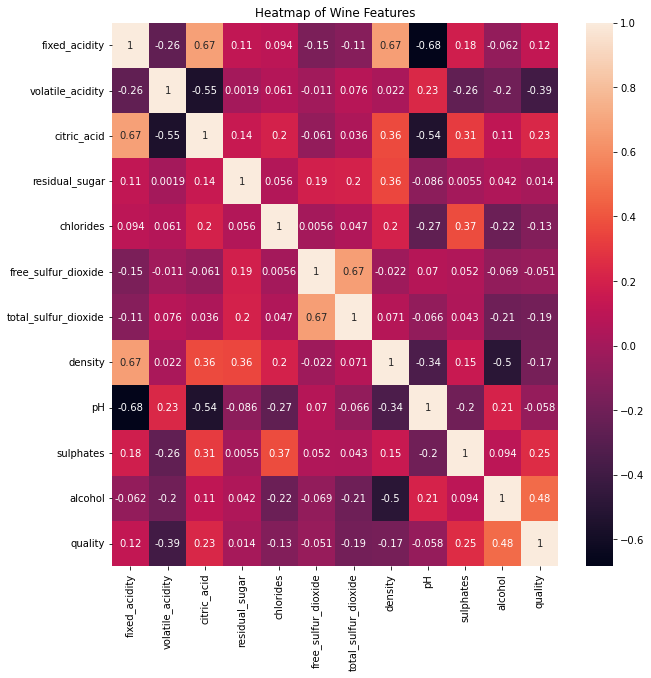

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap of Wine Features")
plt.show()

In [40]:
qual_groups = data.groupby('quality').count()
qual_groups

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [46]:
pie_group = qual_groups.iloc[:,0]

In [145]:
total = np.array(pie_group).sum()
percentages = np.around(np.array(pie_group) / total, 3)

In [157]:
pie_group/total

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: fixed_acidity, dtype: float64

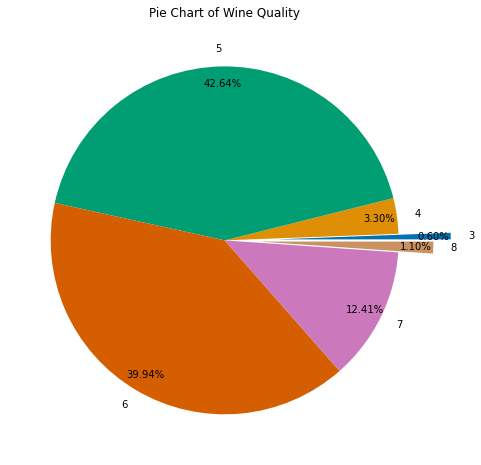

In [163]:
plt.figure(figsize=(8,8))
plt.title("Pie Chart of Wine Quality")
labels = pie_group.index.to_list()
colors = sns.color_palette('colorblind')
explode = (0.3, 0, 0, 0, 0, 0.2)

plt.pie(percentages, 
        colors = colors,
        autopct=lambda x:'{:0.2f}%'.format(x),
        labels= labels,
        explode = explode,
        pctdistance=.9)


plt.show()

In [165]:
pie_group.to_csv("piedata.csv", sep=",", index=False)

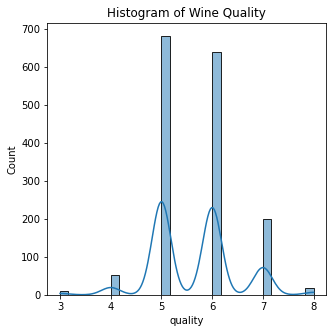

In [169]:
plt.figure(figsize=(5,5))
sns.histplot(data.quality, kde=True)
plt.title("Histogram of Wine Quality")
plt.show()

#### Find and isolate the most salient features

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
from statsmodels.stats.anova import anova_lm

In [18]:
model = ols(formula ='quality ~ fixed_acidity + volatile_acidity + ' +
                     'citric_acid + residual_sugar + chlorides + ' +
                     'free_sulfur_dioxide + total_sulfur_dioxide + ' +
                     'density + pH + sulphates + alcohol',
            data = data).fit()

In [19]:
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
fixed_acidity,0.389486,1.0,0.927528,3.356528e-01
volatile_acidity,33.620004,1.0,80.063159,9.872361e-19
citric_acid,0.646130,1.0,1.538703,2.149942e-01
residual_sugar,0.497624,1.0,1.185048,2.764960e-01
chlorides,8.390612,1.0,19.981523,8.373953e-06
free_sulfur_dioxide,1.694210,1.0,4.034616,4.474495e-02
total_sulfur_dioxide,8.427293,1.0,20.068875,8.004610e-06
density,0.286892,1.0,0.683210,4.086079e-01
pH,1.957306,1.0,4.661156,3.100189e-02
sulphates,26.970929,1.0,64.228957,2.127228e-15


In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 27 Jan 2022   Prob (F-statistic):          1.79e-145
Time:                        19:02:42   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652     21.195      1.036      0.300     -19.607      63.538
fixed_acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric_acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual_sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free_sulfur_dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
qual_corr = data.corr().quality
qual_corr[qual_corr.apply(lambda x: abs(x) > 0.2)]

volatile_acidity   -0.390558
citric_acid         0.226373
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [31]:
corr_names = qual_corr[qual_corr.apply(lambda x: abs(x) > 0.2)].index.to_list()

In [32]:
data_cor = data[corr_names]

In [33]:
data_cor.describe()

,volatile_acidity,citric_acid,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,0.658149,10.422983,5.636023
std,0.179060,0.194801,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,0.730000,11.100000,6.000000
max,1.580000,1.000000,2.000000,14.900000,8.000000


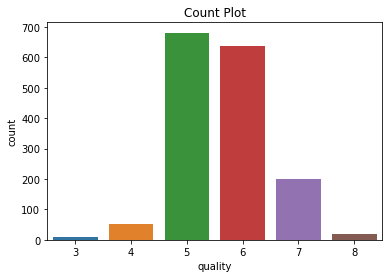

In [38]:
plt.figure(figsize=(6,4))
plt.title("Count Plot")
sns.countplot(data=data, x='quality')

plt.show()

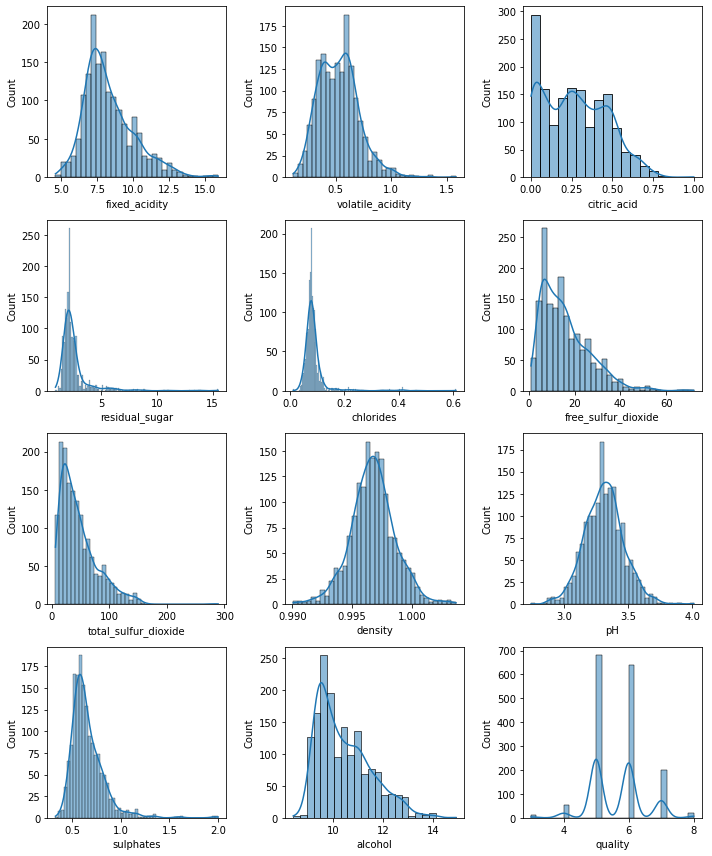

In [74]:
f, axs = plt.subplots(4,3, figsize=(10,12))
row = 0
col = 0
for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axs[row, col], kde=True)
    col += 1
    if (i+1) % 3 == 0:
        row +=1
        col = 0
    
plt.tight_layout()
plt.show()

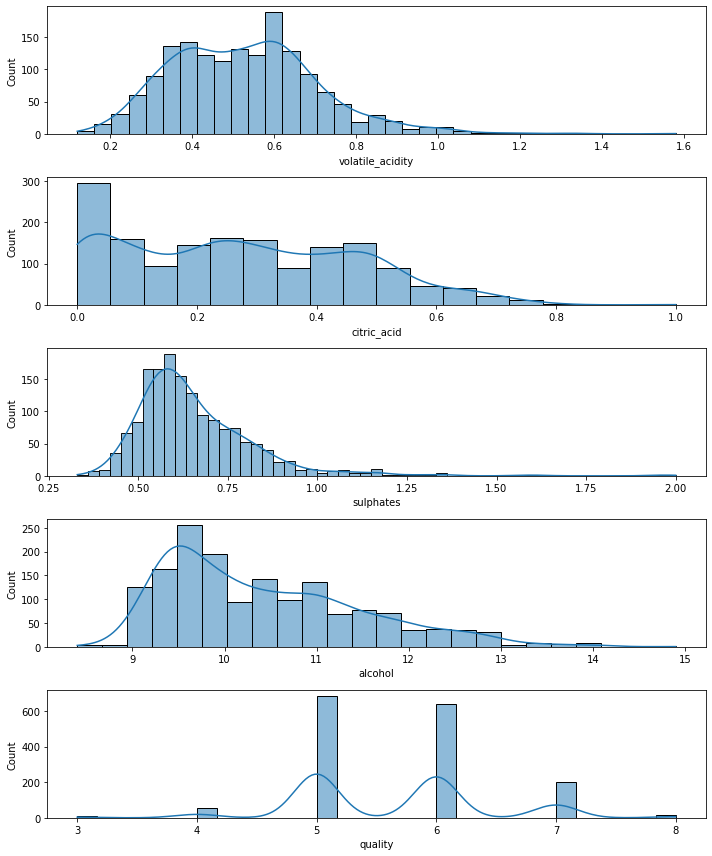

In [84]:
f, axs = plt.subplots(5,1, figsize=(10,12))
row = 0
col = 0
for i, column in enumerate(data_cor.columns):
    sns.histplot(data_cor[column], ax=axs[i], kde=True)
    
plt.tight_layout()
plt.show()

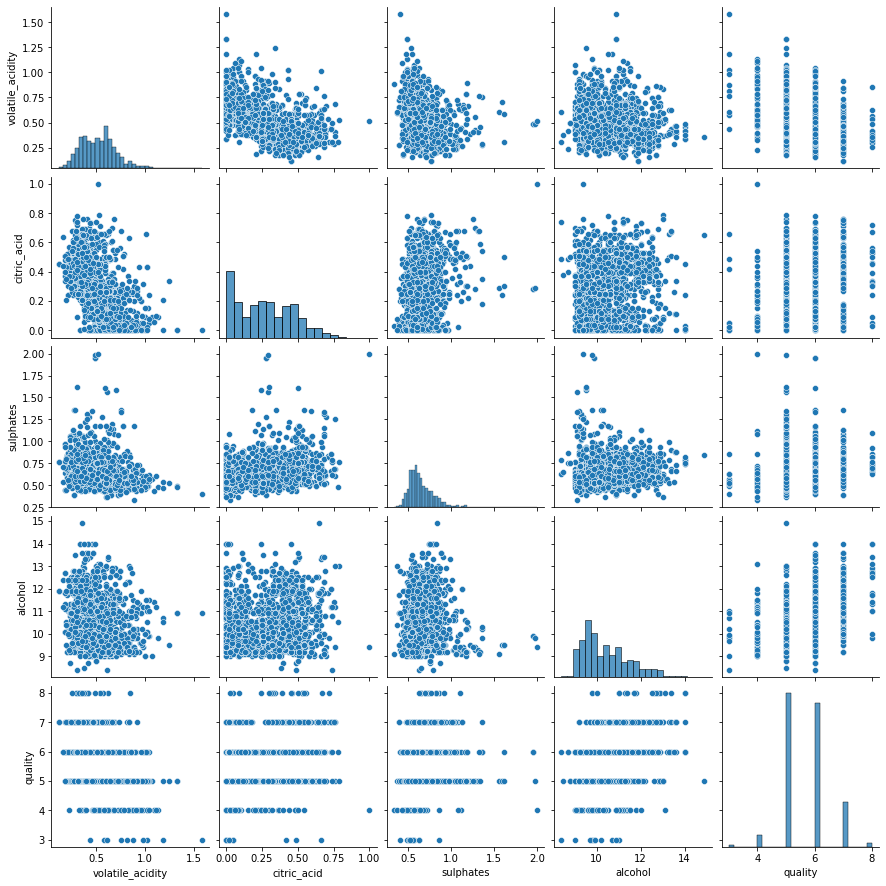

In [85]:
sns.pairplot(data=data_cor)